### **Mount Google Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Required Libraries**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


### **Load Dataset and Show 10 Records**

In [6]:
df = pd.read_csv('/content/drive/MyDrive/loangrant.csv')

df.head(10)


<ipython-input-6-0916f314383f>:2: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/loangrant.csv')


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
5,7e9f6759-6a13-48ef-adfa-ef9fbcfcfcc8,05301ee5-29ec-48b6-b3e5-0813ea25d684,Charged Off,11911,Short Term,7420.0,2 years,Home Mortgage,70475.0,other,886.81,17.7,NaN,13,0,28212,59897,0.0,0.0
6,c2b0aa3e-555b-441b-a4aa-e0e4a52c87d3,db3e74ec-2123-4608-be8d-a93e98cabfcf,Charged Off,28988,Short Term,7420.0,3 years,Home Mortgage,58074.0,Debt Consolidation,871.11,22.8,NaN,9,0,14423,54018,0.0,0.0
7,233e0119-6dfe-47c0-a212-b4cc00371c8d,def66e46-951e-4bff-bf96-87ae6e092e19,Charged Off,17705,Long Term,6630.0,3 years,Own Home,49180.0,Debt Consolidation,274.59,30.2,NaN,10,1,4252,25012,1.0,0.0
8,fc9d109b-15c2-4fe3-b7d8-27610b89f80b,f54c53e4-acd7-4e29-8f55-d2a247a4b62a,Charged Off,16812,Short Term,7360.0,7 years,Rent,50945.0,Debt Consolidation,590.12,14.6,NaN,9,0,12903,15379,0.0,0.0
9,35ee60ed-df2d-4d3a-98ba-03d944d65c74,93cbb4b9-4e88-4b93-8beb-a2a00d415cd5,Charged Off,9796,Long Term,6720.0,< 1 year,Rent,58776.0,Debt Consolidation,666.13,9.4,17.0,12,0,4939,15198,0.0,0.0


## **Encode Categorical Variables**

In [15]:
#unique values
for col in df.select_dtypes(include='object').columns:
    print(f'{col}: {df[col].nunique()} unique values')

#categorical columns to numeric
for col in df.select_dtypes(include='object').columns:

    if df[col].nunique() < 50:  # Adjust threshold as needed
        df[col] = LabelEncoder().fit_transform(df[col])
    else:

        print(f'Dropping column {col} due to too many unique values for LabelEncoder.')
        df = df.drop(col, axis=1)

#Result
print(df.head())
print(df.info())

Loan ID: 88910 unique values
Customer ID: 88910 unique values
Monthly Debt: 90362 unique values
Maximum Open Credit: 67309 unique values
Dropping column Loan ID due to too many unique values for LabelEncoder.
Dropping column Customer ID due to too many unique values for LabelEncoder.
Dropping column Monthly Debt due to too many unique values for LabelEncoder.
Dropping column Maximum Open Credit due to too many unique values for LabelEncoder.
   Loan Status  Current Loan Amount  Term  Credit Score  Years in current job  \
0            0                12232     1        7280.0                    10   
1            0                25014     0        7330.0                     1   
2            0                16117     1        7240.0                     9   
3            0                11716     1        7400.0                     3   
4            0                 9789     0        6860.0                     1   

   Home Ownership  Annual Income  Purpose  Years of Credit History 

## **Define Features (X) and Target (y)**

In [25]:
X = df.drop('Loan Status', axis=1)
y = df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Normalize Data for KNN and SVM**

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **Split into Training and Testing Data (80/20)**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"✅ Training Size: {len(X_train)}, Testing Size: {len(X_test)}")


✅ Training Size: 88885, Testing Size: 22222


## **Initialize Classification Models**

In [26]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Bagging': BaggingClassifier(),
    'Boosting (AdaBoost)': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}


## **Train Models & Evaluate Display Results and Plot ROC Curves**

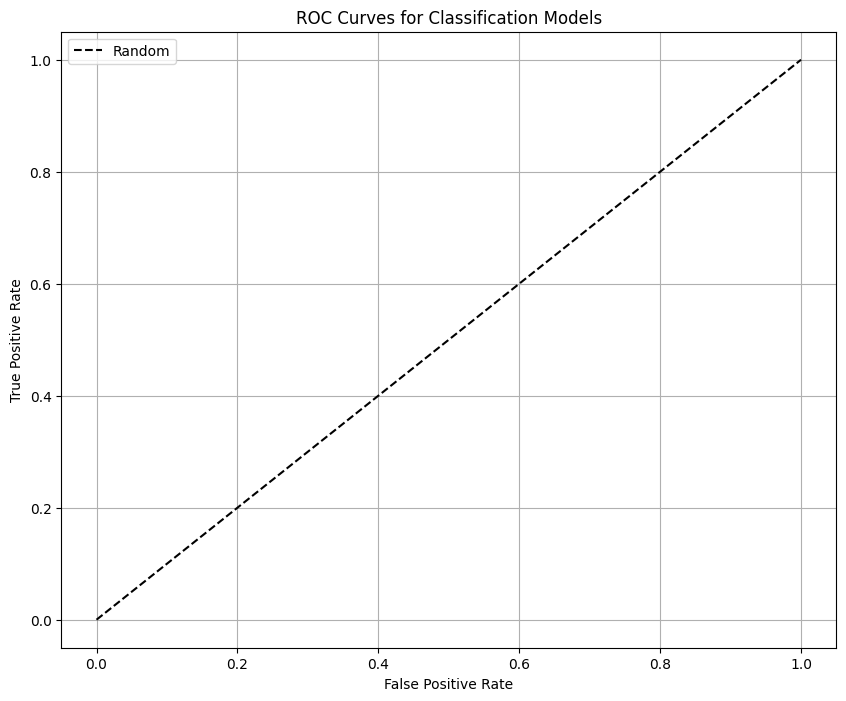

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, matthews_corrcoef, roc_auc_score, roc_curve

plt.figure(figsize=(10, 8))

for name, res in results.items():
    print(f"\n📊 Model: {name}")
    print("Confusion Matrix:")
    print(res['confusion_matrix'])
    print(f"Accuracy: {res['accuracy']:.4f}")
    print(f"Sensitivity (Recall): {res['sensitivity']:.4f}")
    print(f"Specificity: {res['specificity']:.4f}")
    print(f"MCC: {res['mcc']:.4f}")
    print(f"ROC AUC: {res['roc_auc']:.4f}")

    # Plot ROC curve
    plt.plot(res['fpr'], res['tpr'], label=f'{name} (AUC = {res["roc_auc"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend()
plt.grid(True)
plt.show()

### **Plot ROC Curves for All Models Comparison**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


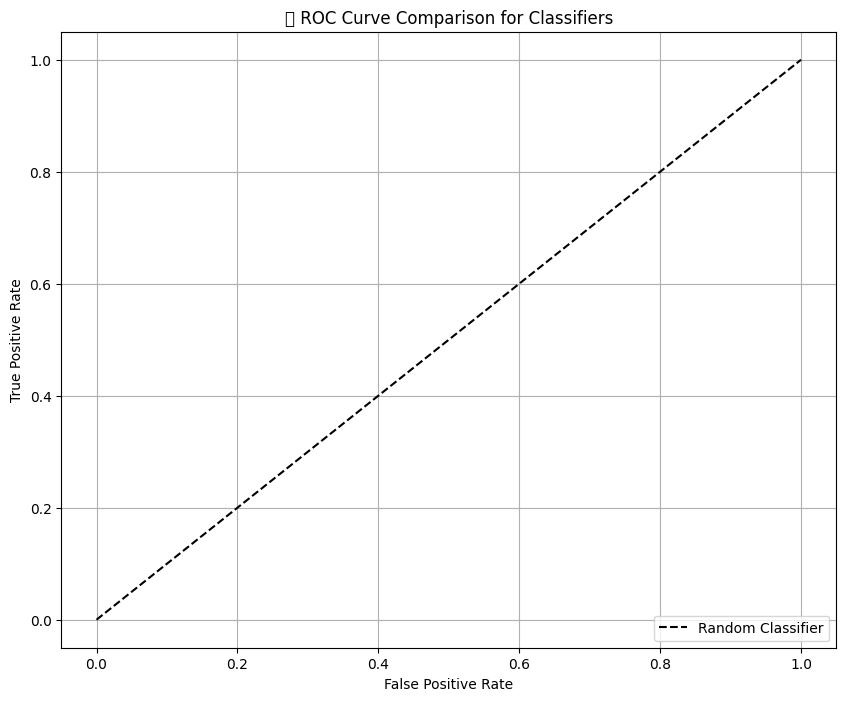

In [24]:
plt.figure(figsize=(10, 8))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('🔍 ROC Curve Comparison for Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
